In [51]:
import load_data

ds = load_data.LabeledDataset(root_dir=load_data.TRAINING_DATA_ROOT)



FileNotFoundError: [Errno 2] No such file or directory: 'data/labeled_data/training/images'

In [5]:
el = ds[0]

for e in el:
    print(e.shape)

torch.Size([3, 313, 500])
torch.Size([2, 4])
torch.Size([2])


In [52]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

# https://pytorch.org/vision/stable/auto_examples/plot_repurposing_annotations.html#sphx-glr-auto-examples-plot-repurposing-annotations-py
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        
        

In [53]:
import torchvision

import importlib

index_to_class = load_data.load_inverted_class_index()

def show_with_bboxes(element):
    img, bboxes, class_idxs = element
    classes = [
        index_to_class[class_idx.item()] 
        for class_idx in class_idxs
    ]
    annotated = torchvision.utils.draw_bounding_boxes(img, bboxes, classes, colors='red')
    show(annotated)



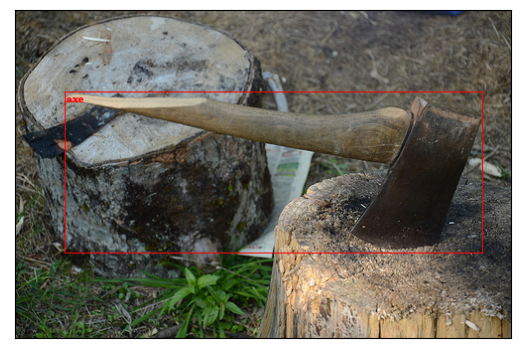

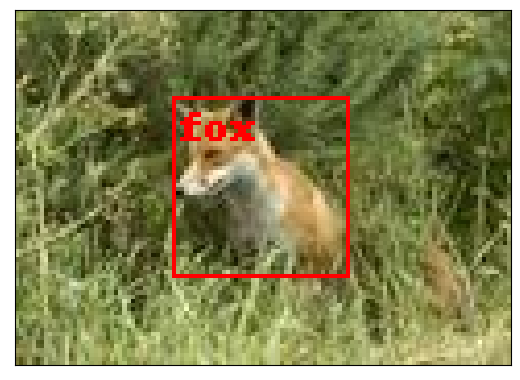

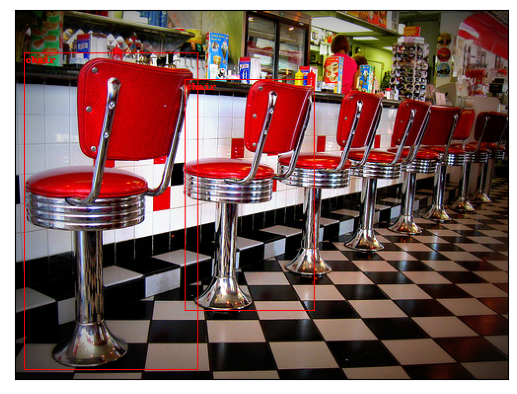

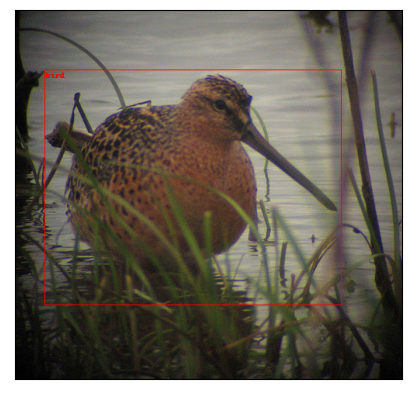

In [26]:
import random

for i, el in zip(range(4), ds):
    idx = random.randint(0, len(ds))
    show_with_bboxes(ds[idx])

In [27]:
index_to_class = load_data.load_inverted_class_index()

print(max(index_to_class))

99


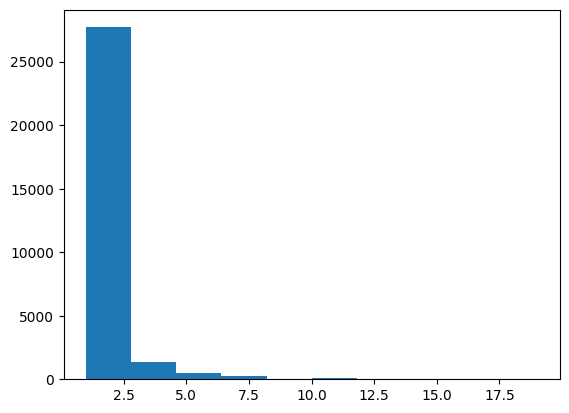

In [31]:
from matplotlib import pyplot

import load_data

ds = load_data.LabeledDataset(root_dir=load_data.TRAINING_DATA_ROOT)

num_items = []

for image, bbox, classes in ds:
    num_items.append(classes.shape[0])
    

pyplot.hist(num_items)
pyplot.show()

In [68]:
import pandas as pd

df = pd.DataFrame(num_items)

print(df.describe())

                  0
count  30000.000000
mean       1.376433
std        1.192887
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       19.000000


torch.Size([3, 186, 210])
(210, 186)


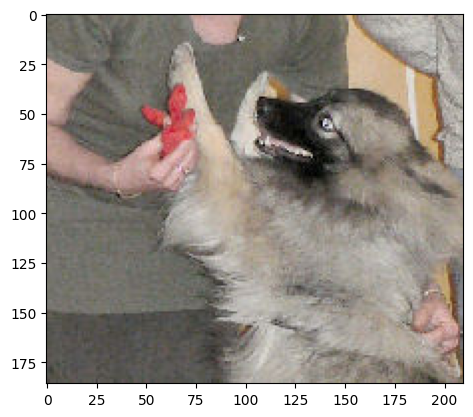

In [44]:
img = torchvision.io.read_image('data/labeled_data/training/images/3031.JPEG')
print(img.shape)
img = F.to_pil_image(img)
print(img.size)
plt.imshow(img)


torch.Size([3, 561, 512])


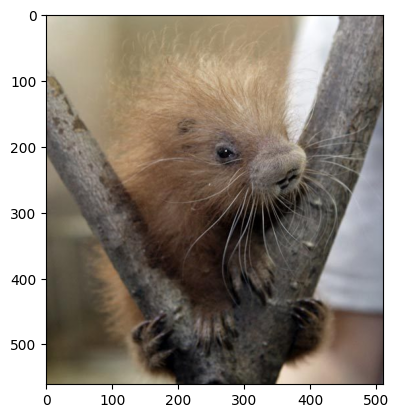

In [50]:
img = torchvision.io.read_image('data/labeled_data/training/images/3029.JPEG')
print(img.shape)
img = F.to_pil_image(img)
plt.imshow(img)


{'id': 3030, 'width': 210, 'height': 186, 'file_name': '3031.JPEG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': '2013-11-14 17:02:52'}


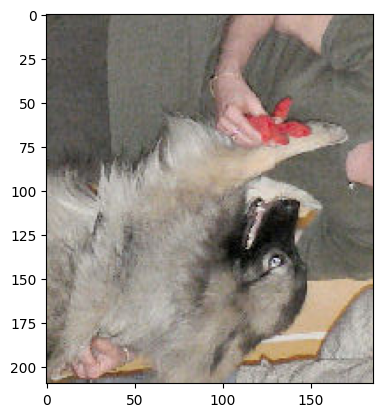

In [49]:
import detectron2.data.detection_utils as utils
import json

train_annotations = json.loads(open('data/annotations/annotations_training.json', 'r').read())
el = train_annotations['images'][3030]
print(el)
img = utils.read_image('data/labeled_data/training/images/' + el['file_name'])
plt.imshow(img)                       



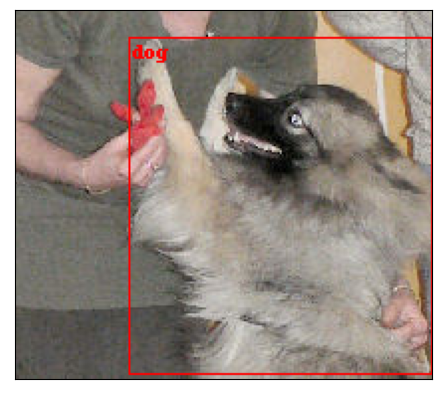

In [51]:
show_with_bboxes(ds[3030])

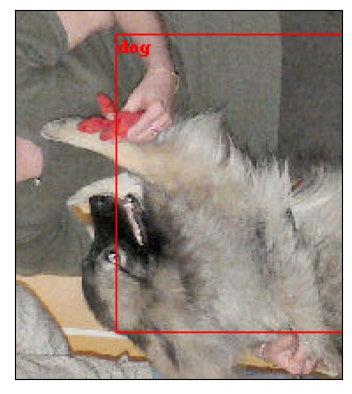

In [73]:
element = ds[3030]
img, bboxes, class_idxs = element
img = img.transpose(1, 2)
classes = [
    index_to_class[class_idx.item()] 
    for class_idx in class_idxs
]
annotated = torchvision.utils.draw_bounding_boxes(img, bboxes, classes, colors='red')
show(annotated)

{'id': 3467, 'width': 800, 'height': 524, 'file_name': '33468.JPEG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': '2013-11-14 17:02:52'}


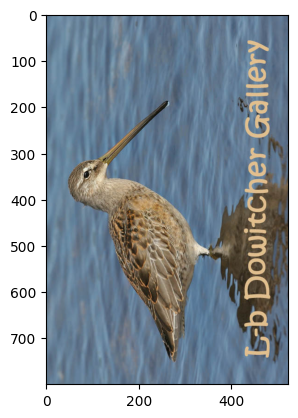

In [58]:
import detectron2.data.detection_utils as utils
import json

train_annotations = json.loads(open('data/annotations/annotations_validation.json', 'r').read())
el = train_annotations['images'][3467]
print(el)
img = utils.read_image('data/labeled_data/validation/images/' + el['file_name'])
plt.imshow(img)                       



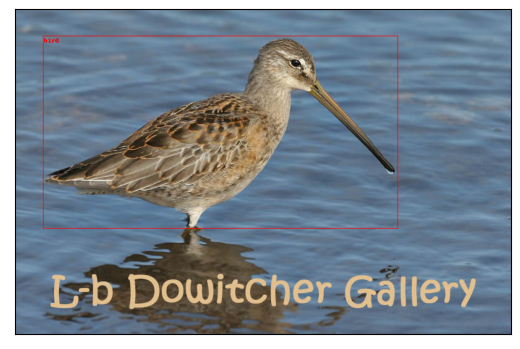

In [59]:
valid_ds = load_data.LabeledDataset(root_dir=load_data.VALIDATION_DATA_ROOT)

show_with_bboxes(valid_ds[3467])

In [61]:
train_annotations = json.loads(open('data/annotations/annotations_training.json', 'r').read())
val_annotations = json.loads(open('data/annotations/annotations_validation.json', 'r').read())


all_annotations = dict(train_annotations, **val_annotations)



In [66]:
imgs = all_annotations['images']

widths = [im['width'] for im in imgs]
heights = [im['height'] for im in imgs]

print(max(widths))
print(max(heights))

print(min(widths))
print(min(heights))

3102
3456
36
36


In [72]:

df = pd.DataFrame(imgs)
df

df.sort_values(by='width')

id  width  height   file_name  license flickr_url coco_url  \
7442    7442     36      50  37443.JPEG        0                       
9710    9710     39      60  39711.JPEG        0                       
3189    3189     39      60  33190.JPEG        0                       
7440    7440     42      42  37441.JPEG        0                       
6218    6218     43      50  36219.JPEG        0                       
...      ...    ...     ...         ...      ...        ...      ...   
9310    9310   3008    1960  39311.JPEG        0                       
16761  16761   3029    2431  46762.JPEG        0                       
6678    6678   3072    2304  36679.JPEG        0                       
14704  14704   3072    2304  44705.JPEG        0                       
18796  18796   3102    2028  48797.JPEG        0                       

             date_captured  
7442   2013-11-14 17:02:52  
9710   2013-11-14 17:02:52  
3189   2013-11-14 17:02:52  
7440   2013-11-14 17:02:52  
6218   2013-11-14 17:02:52  
...                    ...  
9310   2013-11-14 17:02:52  
16761  2013-11-14 17:02:52  
6678   2013-11-14 17:02:52  
14704  2013-11-14 17:02:52  
18796  2013-11-14 17:02:52  

[20000 rows x 8 columns]

In [86]:
df.sort_values(by='height')

id  width  height   file_name  license flickr_url coco_url  \
13955  13955    500      36  43956.JPEG        0                       
15089  15089     50      38  45090.JPEG        0                       
7440    7440     42      42  37441.JPEG        0                       
17429  17429     52      44  47430.JPEG        0                       
19034  19034    500      46  49035.JPEG        0                       
...      ...    ...     ...         ...      ...        ...      ...   
19714  19714   2136    2670  49715.JPEG        0                       
958      958   2217    2672  30959.JPEG        0                       
9086    9086   1913    3000  39087.JPEG        0                       
6981    6981   2000    3008  36982.JPEG        0                       
19285  19285   2304    3456  49286.JPEG        0                       

             date_captured  
13955  2013-11-14 17:02:52  
15089  2013-11-14 17:02:52  
7440   2013-11-14 17:02:52  
17429  2013-11-14 17:02:52  
19034  2013-11-14 17:02:52  
...                    ...  
19714  2013-11-14 17:02:52  
958    2013-11-14 17:02:52  
9086   2013-11-14 17:02:52  
6981   2013-11-14 17:02:52  
19285  2013-11-14 17:02:52  

[20000 rows x 8 columns]

In [91]:
df.sort_values(by='height')['height'].describe()

count    20000.00000
mean       380.98150
std        133.58079
min         36.00000
25%        333.00000
50%        375.00000
75%        435.00000
max       3456.00000
Name: height, dtype: float64

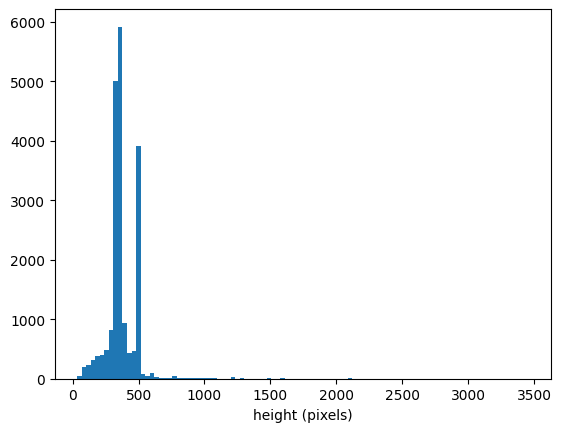

In [92]:
plt.hist(df.sort_values(by='height')['height'], bins=100)
plt.xlabel('count')
plt.xlabel('height (pixels)')
plt.show()

In [96]:
class MergedDataset(torch.utils.data.Dataset):
    def __init__(self, datasets):
        self.datasets = datasets
        
    def __len__(self):
        return sum(map(len, self.datasets))
    
    def __getitem__(self, idx):
        for ds in self.datasets:
            print('try ', idx)
            if idx >= len(ds):
                idx -= len(ds)
            else:
                return ds[idx]
            
train_ds = load_data.LabeledDataset(root_dir=load_data.TRAINING_DATA_ROOT)
val_ds = load_data.LabeledDataset(root_dir=load_data.VALIDATION_DATA_ROOT)
            
            
merged = MergedDataset([train_ds, val_ds])



            

try  37442
try  7442
try  48797
try  18797


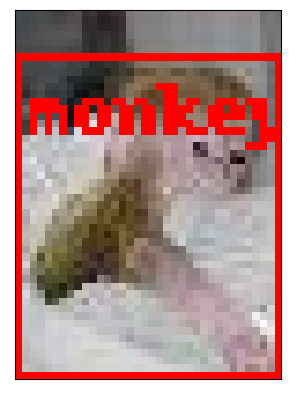

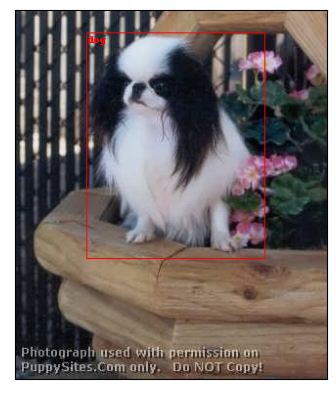

In [85]:
show_with_bboxes(merged[37442])
show_with_bboxes(merged[48797])

try  37442
try  7442


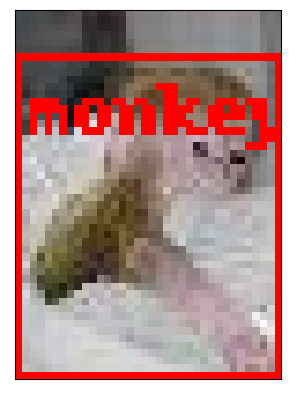

In [93]:
element = merged[37442]
img, bboxes, class_idxs = element
img = img.transpose(1, 2)
classes = [
    index_to_class[class_idx.item()] 
    for class_idx in class_idxs
]
annotated = torchvision.utils.draw_bounding_boxes(img, bboxes, classes, colors='red')
show(annotated)

In [94]:
train_annotations = json.loads(open('data/annotations/annotations_training.json', 'r').read())
imgs = train_annotations['images']

widths = [im['width'] for im in imgs]
heights = [im['height'] for im in imgs]

print(max(widths))
print(max(heights))

print(min(widths))
print(min(heights))

3888
4682
25
33


In [95]:
df = pd.DataFrame(imgs)

df['area'] = df['width'] * df['height']

df.sort_values(by='area')

id  width  height   file_name  license flickr_url coco_url  \
4247    4247     25      62   4248.JPEG        0                       
7209    7209     50      33   7210.JPEG        0                       
10881  10881     48      48  10882.JPEG        0                       
19544  19544     50      50  19545.JPEG        0                       
5225    5225     50      50   5226.JPEG        0                       
...      ...    ...     ...         ...      ...        ...      ...   
7026    7026   3264    2448   7027.JPEG        0                       
27286  27286   3648    2736  27287.JPEG        0                       
26862  26862   3888    2592  26863.JPEG        0                       
4274    4274   2848    4041   4275.JPEG        0                       
18506  18506   3555    4682  18507.JPEG        0                       

             date_captured      area  
4247   2013-11-14 17:02:52      1550  
7209   2013-11-14 17:02:52      1650  
10881  2013-11-14 17:02:52      2304  
19544  2013-11-14 17:02:52      2500  
5225   2013-11-14 17:02:52      2500  
...                    ...       ...  
7026   2013-11-14 17:02:52   7990272  
27286  2013-11-14 17:02:52   9980928  
26862  2013-11-14 17:02:52  10077696  
4274   2013-11-14 17:02:52  11508768  
18506  2013-11-14 17:02:52  16644510  

[30000 rows x 9 columns]

In [122]:
df = pd.DataFrame(imgs)

df['area'] = df['width'] * df['height']

df.sort_values(by='height')

id  width  height   file_name  license flickr_url coco_url  \
7209    7209     50      33   7210.JPEG        0                       
20396  20396    500      33  20397.JPEG        0                       
4540    4540    500      35   4541.JPEG        0                       
20761  20761    500      38  20762.JPEG        0                       
8822    8822    113      44   8823.JPEG        0                       
...      ...    ...     ...         ...      ...        ...      ...   
12525  12525   1944    2592  12526.JPEG        0                       
27286  27286   3648    2736  27287.JPEG        0                       
20668  20668   2048    3072  20669.JPEG        0                       
4274    4274   2848    4041   4275.JPEG        0                       
18506  18506   3555    4682  18507.JPEG        0                       

             date_captured      area  
7209   2013-11-14 17:02:52      1650  
20396  2013-11-14 17:02:52     16500  
4540   2013-11-14 17:02:52     17500  
20761  2013-11-14 17:02:52     19000  
8822   2013-11-14 17:02:52      4972  
...                    ...       ...  
12525  2013-11-14 17:02:52   5038848  
27286  2013-11-14 17:02:52   9980928  
20668  2013-11-14 17:02:52   6291456  
4274   2013-11-14 17:02:52  11508768  
18506  2013-11-14 17:02:52  16644510  

[30000 rows x 9 columns]

In [124]:
df = pd.DataFrame(imgs)

df['ratio'] = df['width'] / df['height']

df.sort_values(by='ratio')

id  width  height   file_name  license flickr_url coco_url  \
3176    3176     49     500   3177.JPEG        0                       
3043    3043    143     500   3044.JPEG        0                       
23163  23163     93     300  23164.JPEG        0                       
27055  27055    155     500  27056.JPEG        0                       
12110  12110    167     500  12111.JPEG        0                       
...      ...    ...     ...         ...      ...        ...      ...   
7809    7809    500     100   7810.JPEG        0                       
3350    3350    500      52   3351.JPEG        0                       
20761  20761    500      38  20762.JPEG        0                       
4540    4540    500      35   4541.JPEG        0                       
20396  20396    500      33  20397.JPEG        0                       

             date_captured      ratio  
3176   2013-11-14 17:02:52   0.098000  
3043   2013-11-14 17:02:52   0.286000  
23163  2013-11-14 17:02:52   0.310000  
27055  2013-11-14 17:02:52   0.310000  
12110  2013-11-14 17:02:52   0.334000  
...                    ...        ...  
7809   2013-11-14 17:02:52   5.000000  
3350   2013-11-14 17:02:52   9.615385  
20761  2013-11-14 17:02:52  13.157895  
4540   2013-11-14 17:02:52  14.285714  
20396  2013-11-14 17:02:52  15.151515  

[30000 rows x 9 columns]

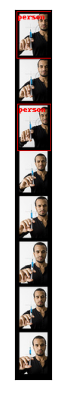

In [125]:
show_with_bboxes(train_ds[3176])


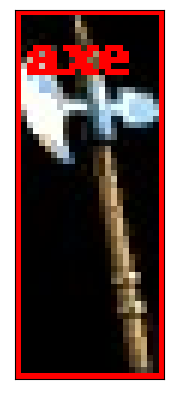

In [102]:
show_with_bboxes(train_ds[4247])


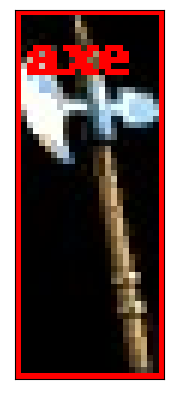

In [99]:
element = train_ds[4247]
img, bboxes, class_idxs = element
classes = [
    index_to_class[class_idx.item()] 
    for class_idx in class_idxs
]
annotated = torchvision.utils.draw_bounding_boxes(img, bboxes, classes, colors='red')
show(annotated)

{'id': 4247, 'width': 25, 'height': 62, 'file_name': '4248.JPEG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': '2013-11-14 17:02:52'}


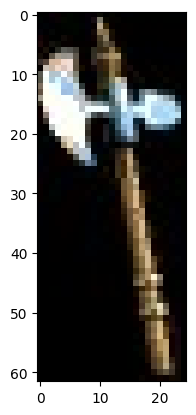

In [103]:
import detectron2.data.detection_utils as utils
import json

train_annotations = json.loads(open('data/annotations/annotations_training.json', 'r').read())
el = train_annotations['images'][4247]
print(el)
img = utils.read_image('data/labeled_data/training/images/' + el['file_name'])
plt.imshow(img)                       


{'id': 4247, 'width': 25, 'height': 62, 'file_name': '4248.JPEG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': '2013-11-14 17:02:52'}
<class 'numpy.ndarray'>
(62, 25, 3)
uint8


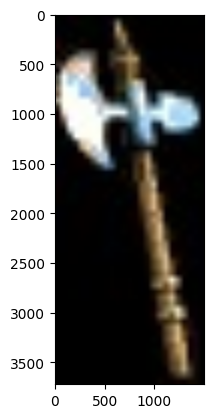

In [114]:
import detectron2.data.detection_utils as utils
import detectron2.data.transforms as T
import json

train_annotations = json.loads(open('data/annotations/annotations_training.json', 'r').read())
el = train_annotations['images'][4247]
print(el)
img = utils.read_image('data/labeled_data/training/images/' + el['file_name'])
print(type(img))
print(img.shape)
print(img.dtype)
resize = T.ResizeShortestEdge(1500)

transform = resize.get_transform(img)
img = transform.apply_image(img)

plt.imshow(img)                       



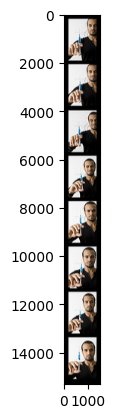

In [126]:
import PIL 
import detectron2.data.transforms as T

train_annotations = json.loads(open('data/annotations/annotations_training.json', 'r').read())
el = train_annotations['images'][3176]
img = utils.read_image('data/labeled_data/training/images/' + el['file_name'])

resize = T.ResizeShortestEdge(1500)

transform = resize.get_transform(img)
img = transform.apply_image(img)

plt.imshow(img)                       



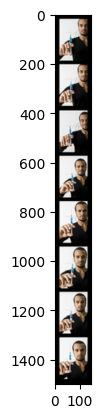

In [131]:
import PIL 
import detectron2.data.transforms as T

train_annotations = json.loads(open('data/annotations/annotations_training.json', 'r').read())
el = train_annotations['images'][3176]
img = utils.read_image('data/labeled_data/training/images/' + el['file_name'])

resize = T.ResizeShortestEdge((150, 150), 1500)

transform = resize.get_transform(img)
img = transform.apply_image(img)

plt.imshow(img)                       



In [129]:
resize = T.ResizeShortestEdge((150, 150), 1500)
resize.max_size

1500

{'id': 128, 'width': 224, 'height': 224, 'file_name': '100110.PNG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': '2013-11-14 17:02:52'}


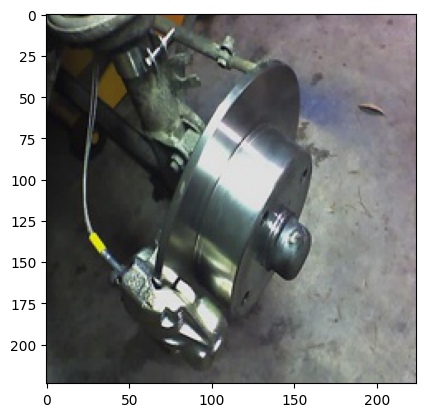

In [141]:
import detectron2.data.detection_utils as utils
import json

train_annotations = json.loads(open('data/annotations/annotations_unlabeled.json', 'r').read())
el = train_annotations['images'][128]
print(el)
img = utils.read_image('data/unlabeled_data/' + el['file_name'])
plt.imshow(img)                       



{'id': 128, 'width': 1600, 'height': 1200, 'file_name': '30129.JPEG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': '2013-11-14 17:02:52'}
<PIL.Image.Image image mode=RGB size=1600x1200 at 0x7FEB497BBEE0>


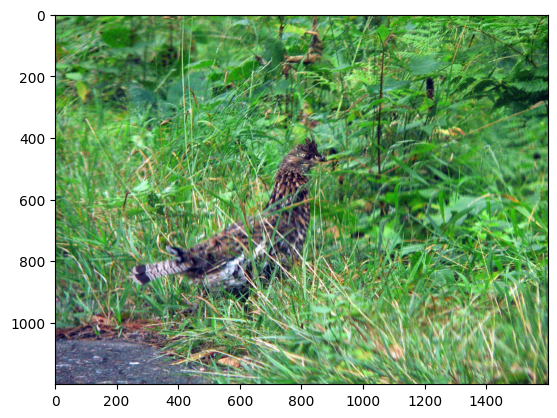

In [148]:
import PIL
#import detectron2.data.detection_utils as utils
import json

train_annotations = json.loads(open('data/annotations/annotations_validation.json', 'r').read())
el = train_annotations['images'][128]
print(el)
with open('data/labeled_data/validation/images/' + el['file_name'], 'rb') as f:
    img = PIL.Image.open(f).convert("RGB")
print(img)
plt.imshow(img)                       



{'id': 37, 'width': 500, 'height': 352, 'file_name': '30038.JPEG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': '2013-11-14 17:02:52'}
<PIL.Image.Image image mode=RGB size=500x352 at 0x7FEB485C2580>


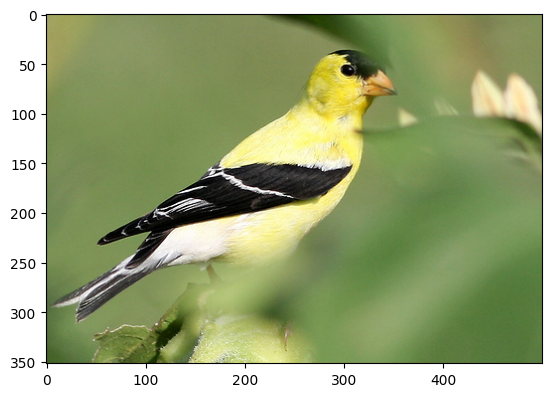

In [149]:
import PIL
#import detectron2.data.detection_utils as utils
import json

train_annotations = json.loads(open('data/annotations/annotations_validation.json', 'r').read())
el = train_annotations['images'][37]
print(el)
with open('data/labeled_data/validation/images/' + el['file_name'], 'rb') as f:
    img = PIL.Image.open(f).convert("RGB")
print(img)
plt.imshow(img)                       



In [152]:
import PIL
#import detectron2.data.detection_utils as utils
import json
import torchvision 

train_annotations = json.loads(open('data/annotations/annotations_validation.json', 'r').read())
el = train_annotations['images'][37]
print(el)
with open('data/labeled_data/validation/images/' + el['file_name'], 'rb') as f:
    img = PIL.Image.open(f).convert("RGB")
print(img)
t = torchvision.transforms.functional.to_tensor(img)
print(t)




{'id': 37, 'width': 500, 'height': 352, 'file_name': '30038.JPEG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': '2013-11-14 17:02:52'}
<PIL.Image.Image image mode=RGB size=500x352 at 0x7FEB536A3160>
tensor([[[0.6275, 0.6275, 0.6235,  ..., 0.5176, 0.5137, 0.5059],
         [0.6275, 0.6275, 0.6196,  ..., 0.5137, 0.5137, 0.5059],
         [0.6196, 0.6196, 0.6235,  ..., 0.5176, 0.5137, 0.5098],
         ...,
         [0.2667, 0.2667, 0.2549,  ..., 0.3451, 0.3490, 0.3490],
         [0.2667, 0.2706, 0.2549,  ..., 0.3451, 0.3451, 0.3451],
         [0.2627, 0.2667, 0.2588,  ..., 0.3529, 0.3490, 0.3529]],

        [[0.6353, 0.6353, 0.6235,  ..., 0.5686, 0.5647, 0.5608],
         [0.6353, 0.6353, 0.6275,  ..., 0.5647, 0.5647, 0.5608],
         [0.6392, 0.6392, 0.6314,  ..., 0.5686, 0.5725, 0.5686],
         ...,
         [0.3804, 0.3804, 0.3765,  ..., 0.4824, 0.4902, 0.4902],
         [0.3882, 0.3922, 0.3843,  ..., 0.4824, 0.4824, 0.4824],
         [0.3843, 0.3882, 0.3882,  .

In [160]:
import PIL
#import detectron2.data.detection_utils as utils
import json
import torchvision 

#train_annotations = json.loads(open('data/annotations/annotations_validation.json', 'r').read())
el = train_annotations['images'][37]
print(el)
img = utils.read_image('data/labeled_data/validation/images/' + el['file_name'])
print('shape: ', img.shape)
print(img)
t = torchvision.transforms.functional.to_tensor(img)
print('shape: ', t.shape)
print(t)
print(t * 255)



{'id': 37, 'width': 500, 'height': 352, 'file_name': '30038.JPEG', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': '2013-11-14 17:02:52'}
shape:  (352, 500, 3)
[[[160 162  99]
  [160 162  99]
  [159 159  97]
  ...
  [132 145  92]
  [131 144  91]
  [129 143  90]]

 [[160 162  99]
  [160 162  99]
  [158 160  97]
  ...
  [131 144  91]
  [131 144  91]
  [129 143  90]]

 [[158 163  99]
  [158 163  99]
  [159 161  98]
  ...
  [132 145  91]
  [131 146  91]
  [130 145  90]]

 ...

 [[ 68  97  39]
  [ 68  97  39]
  [ 65  96  37]
  ...
  [ 88 123  65]
  [ 89 125  64]
  [ 89 125  64]]

 [[ 68  99  40]
  [ 69 100  41]
  [ 65  98  41]
  ...
  [ 88 123  65]
  [ 88 123  65]
  [ 88 123  65]]

 [[ 67  98  39]
  [ 68  99  40]
  [ 66  99  42]
  ...
  [ 90 123  66]
  [ 89 122  65]
  [ 90 123  68]]]
shape:  torch.Size([3, 352, 500])
tensor([[[0.6275, 0.6275, 0.6235,  ..., 0.5176, 0.5137, 0.5059],
         [0.6275, 0.6275, 0.6196,  ..., 0.5137, 0.5137, 0.5059],
         [0.6196, 0.6196, 0.6

In [20]:
import pandas as pd

teacher_ap = pd.read_csv("data/analysis/teacher_AP.csv")
student_ap = pd.read_csv("data/analysis/student_AP.csv")

teacher_ap

Wall time    Step      Value
0   1.669651e+09    5999   0.000308
1   1.669657e+09   11999   0.000308
2   1.669662e+09   17999   0.000308
3   1.669667e+09   23999   0.000308
4   1.669673e+09   29999   0.000308
..           ...     ...        ...
75  1.670580e+09  413999  40.892864
76  1.670590e+09  419999  40.930660
77  1.670601e+09  425999  40.954857
78  1.670612e+09  431999  40.918674
79  1.670622e+09  437999  41.051994

[80 rows x 3 columns]

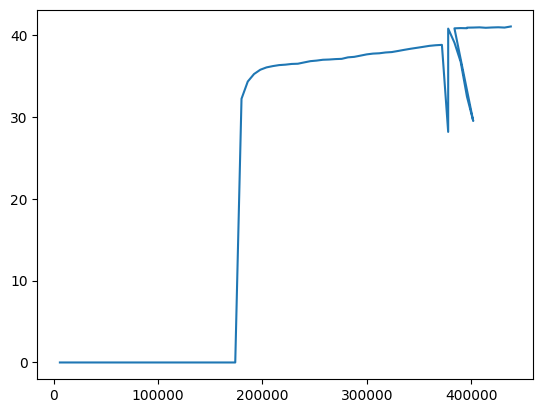

In [5]:
from matplotlib import pyplot as plt

plt.plot(teacher_ap['Step'], teacher_ap['Value'])

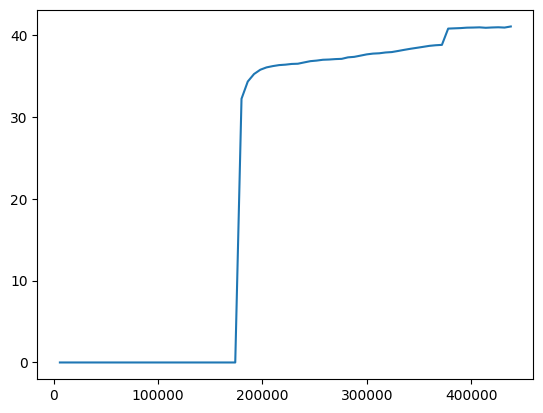

In [17]:
def remove_older_runs(df):
    latest = df.groupby(by='Step', sort=True).agg({
        'Step': 'max',
        'Wall time': 'max',
        'Value': 'idxmax'
    })
    latest['Value'] = df.loc[latest['Value'], 'Value'].values
    return latest

df =  remove_older_runs(teacher_ap)
plt.plot(df['Step'], df['Value'])

In [ ]:
teacher_ap_last = remove_older_runs(teacher_ap)
student_ap_last = remove_older_runs(student_ap)


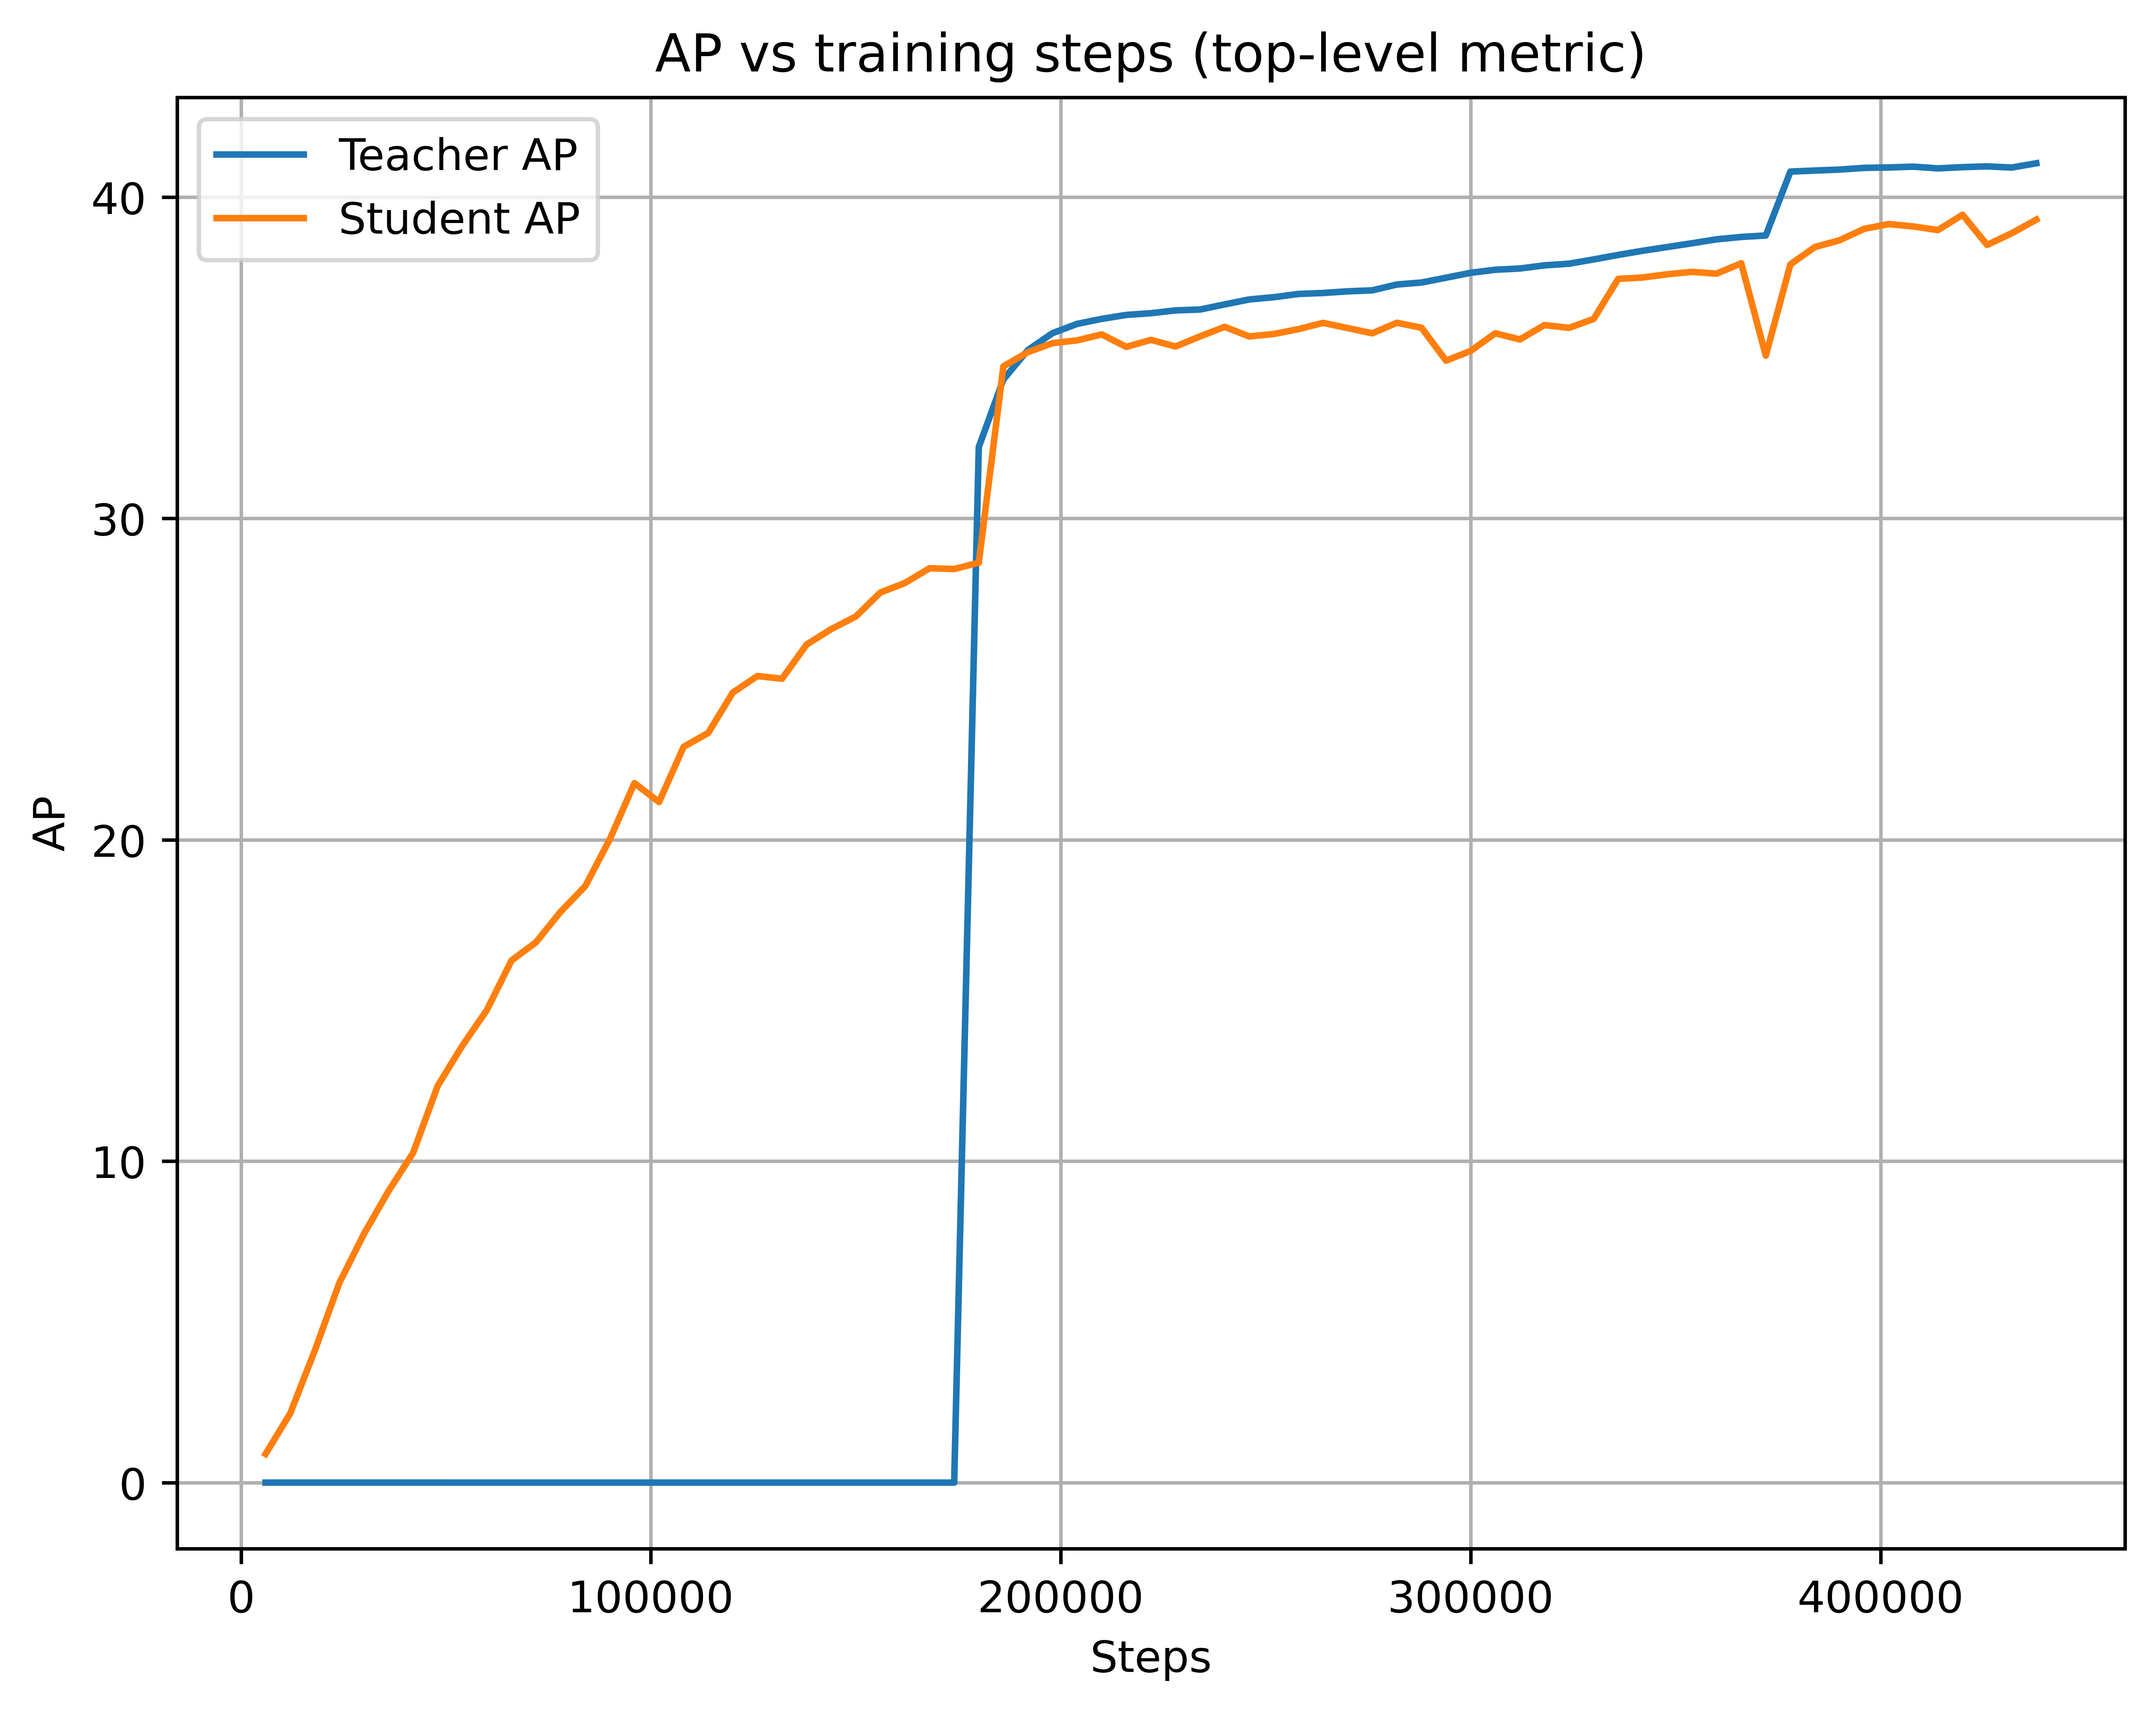

In [39]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=800)

plt.plot(teacher_ap_last['Step'], teacher_ap_last['Value'], label='Teacher AP')
plt.plot(student_ap_last['Step'], student_ap_last['Value'], label='Student AP')

plt.legend(loc='upper left')
plt.title('AP vs training steps (top-level metric)')
plt.ylabel('AP')
plt.xlabel('Steps')
plt.grid()

In [31]:

teacher_ap_nail = remove_older_runs(pd.read_csv("data/analysis/nail_ap_teacher.csv"))
student_ap_nail = remove_older_runs(pd.read_csv("data/analysis/nail_ap_student.csv"))

teacher_ap_dog = remove_older_runs(pd.read_csv("data/analysis/dog_ap_teacher.csv"))
student_ap_dog = remove_older_runs(pd.read_csv("data/analysis/dog_ap_student.csv"))


In [33]:
def do_plot(df, label):
    plt.plot(df['Step'], df['Value'], label=label)

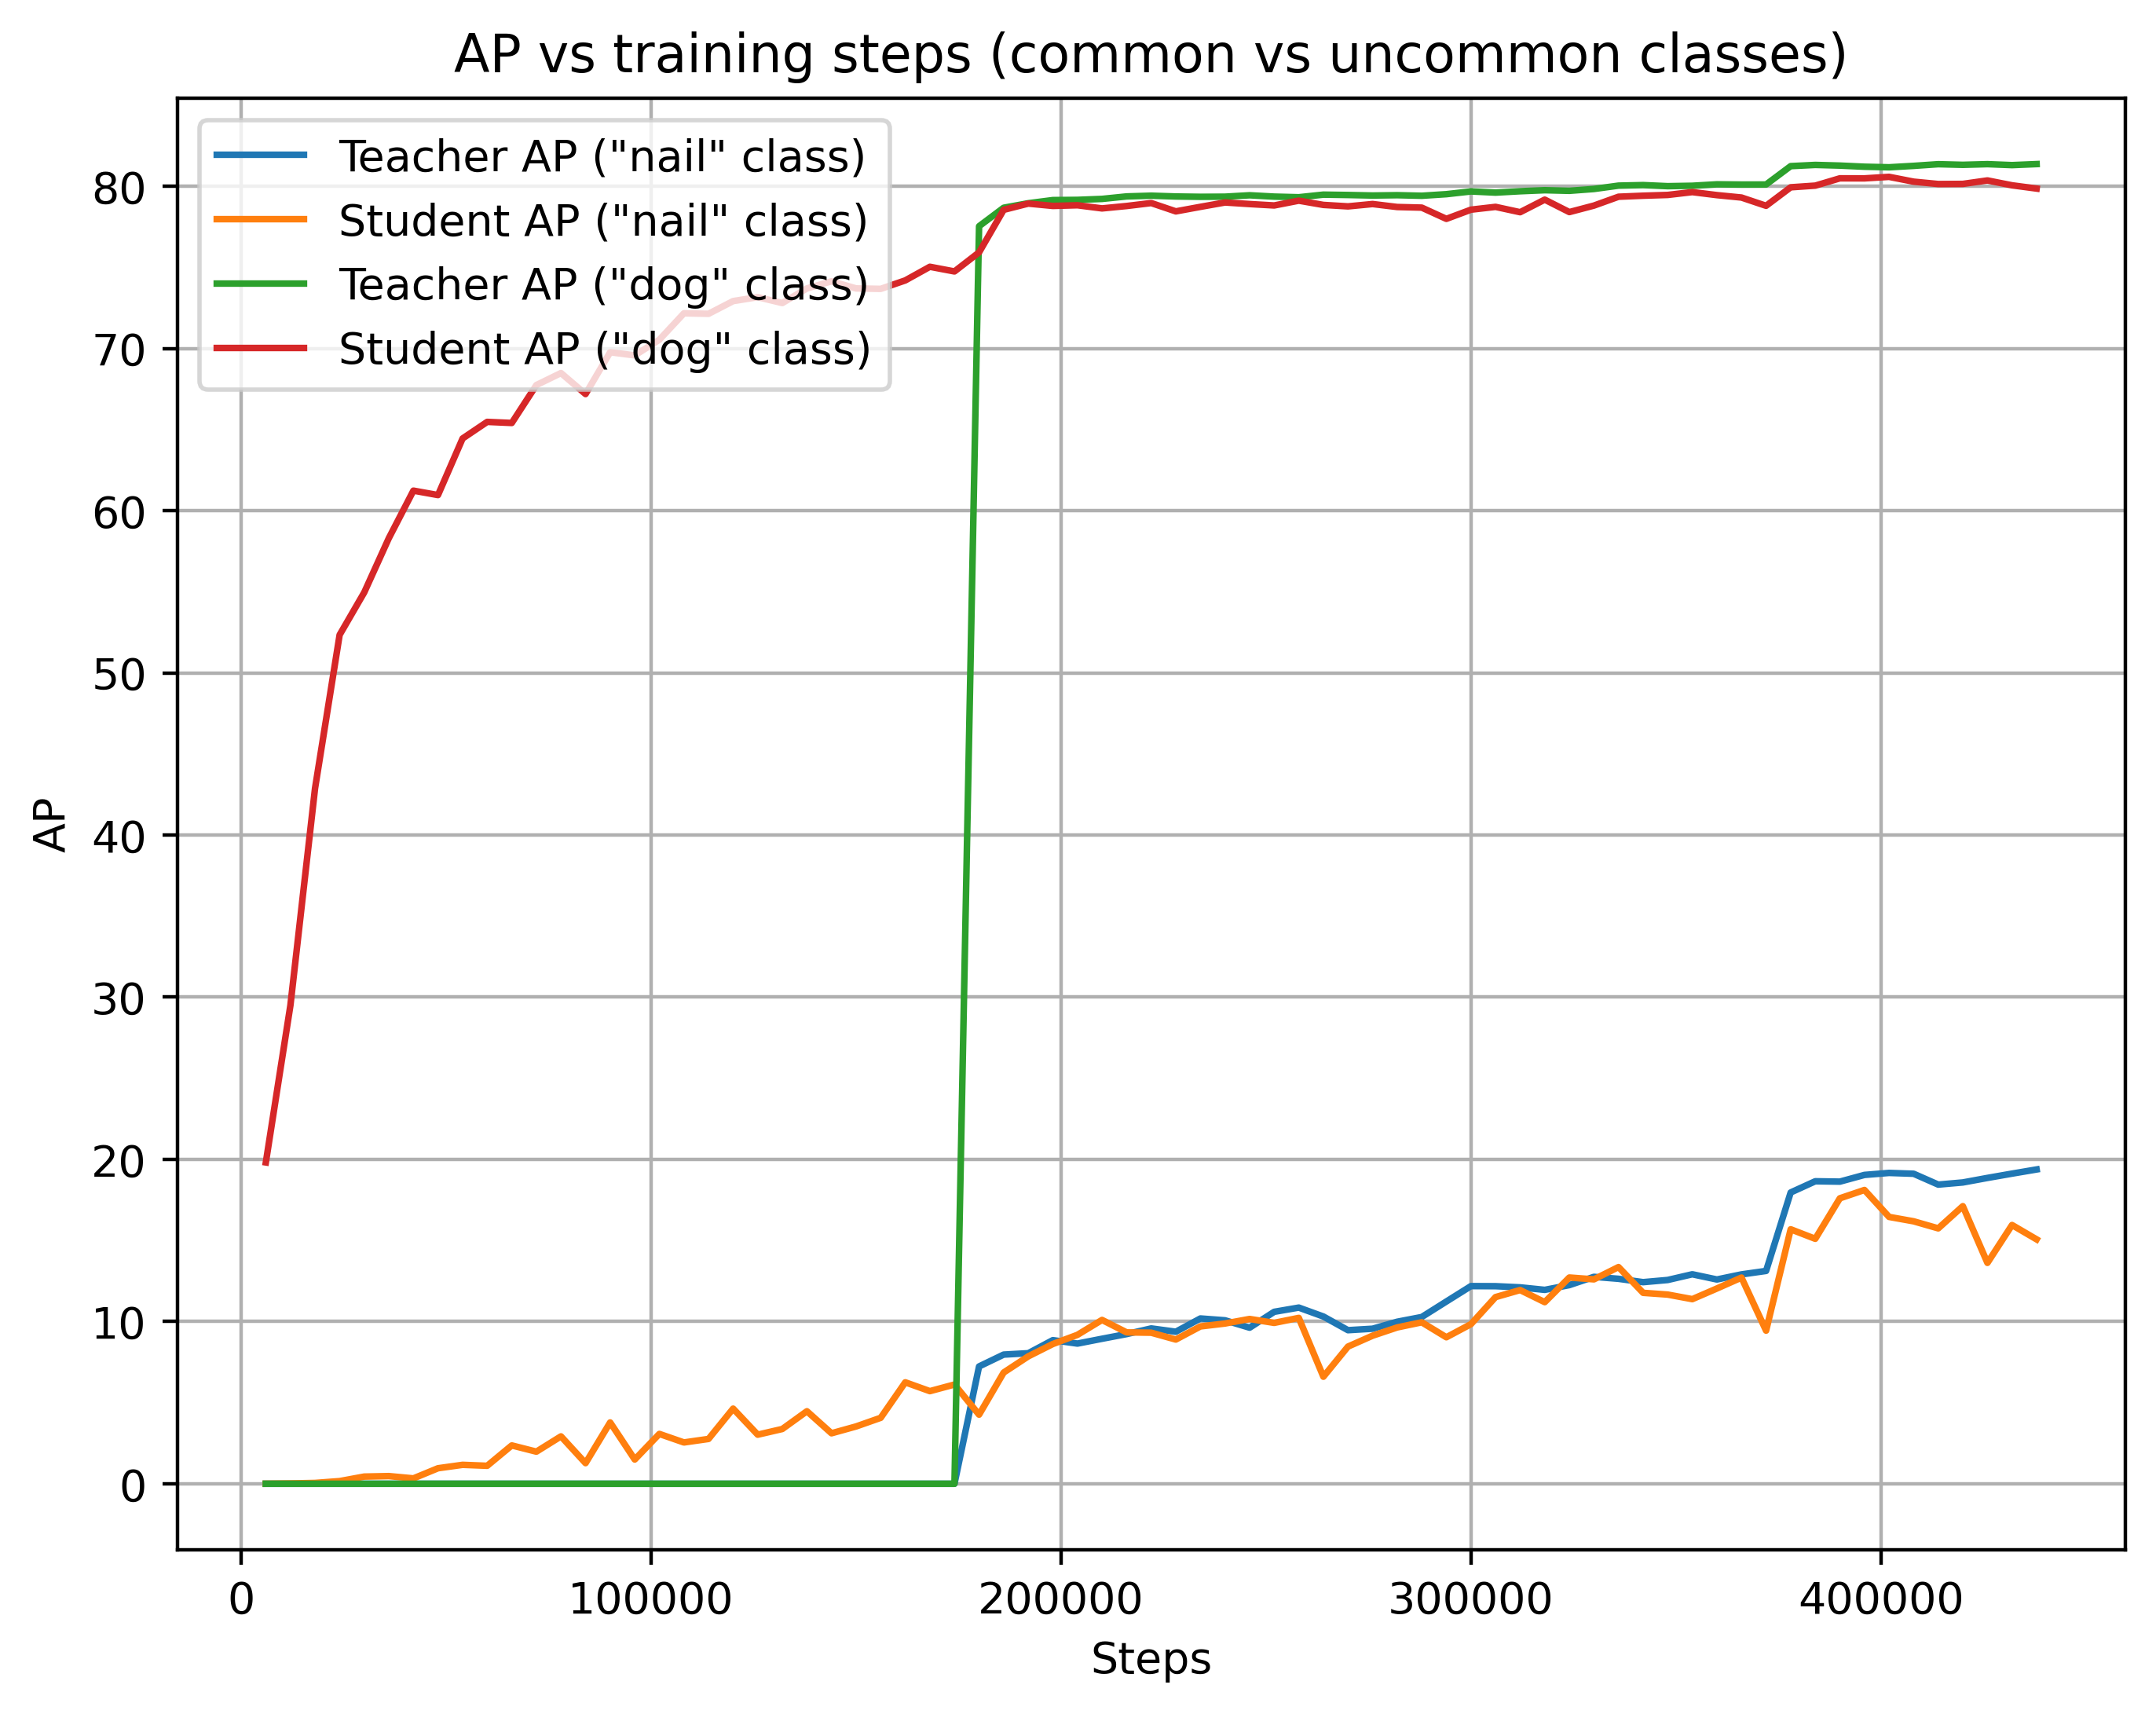

In [38]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=400)

do_plot(teacher_ap_nail, 'Teacher AP ("nail" class)')
do_plot(student_ap_nail, 'Student AP ("nail" class)')


do_plot(teacher_ap_dog, 'Teacher AP ("dog" class)')
do_plot(student_ap_dog, 'Student AP ("dog" class)')

plt.legend(loc='upper left')
plt.title('AP vs training steps (common vs uncommon classes)')
plt.ylabel('AP')
plt.xlabel('Steps')
plt.grid()

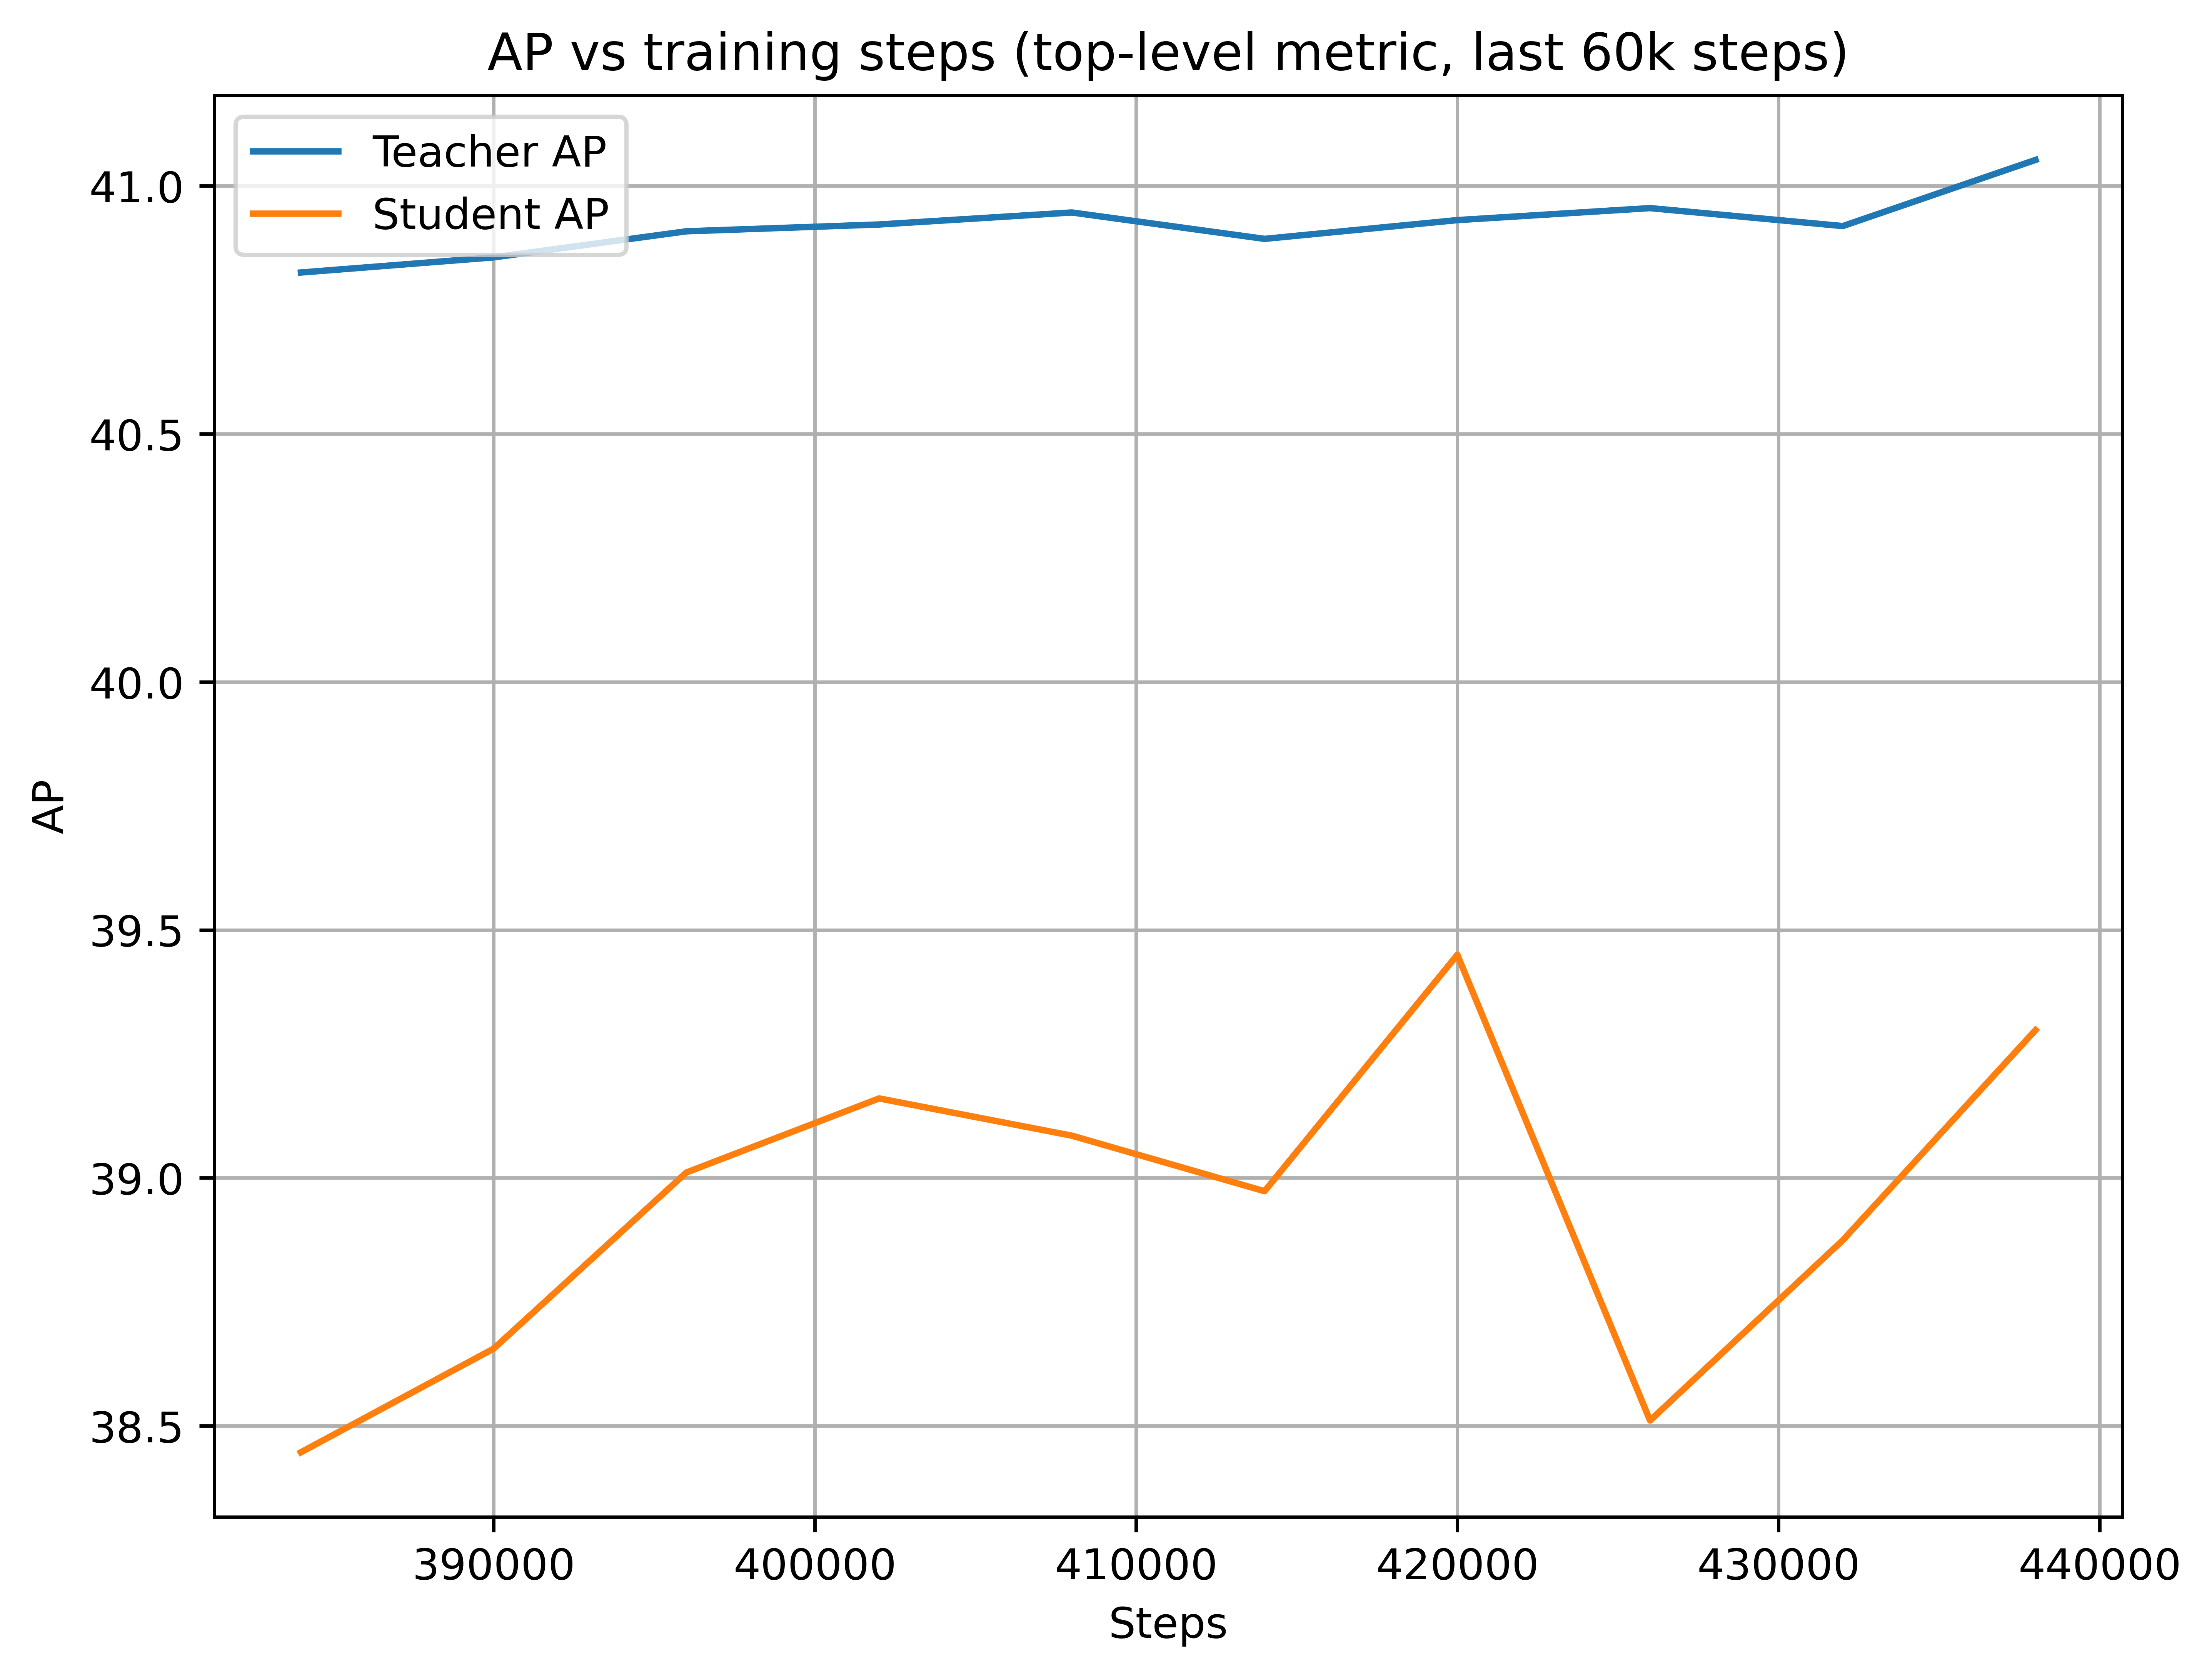

In [44]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=800)

teacher_ap_filter = teacher_ap_last.tail(10)
student_ap_filter = student_ap_last.tail(10)

do_plot(teacher_ap_filter, 'Teacher AP')
do_plot(student_ap_filter, 'Student AP')

plt.legend(loc='upper left')
plt.title('AP vs training steps (top-level metric, last 60k steps)')
plt.ylabel('AP')
plt.xlabel('Steps')
plt.grid()

In [ ]:
import json

results_440k = json.load(open('data/analysis/coco_instances_results_0434999.json', 'r'))